## Training Model to Identify unique patients in the sample dataset

### Data Preparation

In [322]:
import numpy as np
import pandas as pd
df=pd.read_csv('innovaccer.csv')
df.head()

,ln,dob,gn,fn
0,SMITH JR,01/03/68,F,WILLIAM
1,ROTHMEYER JR,01/03/68,F,WILLIAM
2,ASBY JR,01/03/68,F,WILLIAM
3,SALTER JR,01/03/68,F,WILLIAM
4,SALTER JR,01/03/68,F,WILLIAM


In [323]:
# Converting 'dob' column from date format to number of days till 26/02/18
from datetime import datetime

date_format = "%d/%m/%y"
df.dob=[(datetime.strptime(a, date_format)-datetime.strptime('26/02/18', date_format)).days  for a in df.dob  ]

In [324]:
# Splitting 'fn' and 'ln' into new columns 'fn1','fn2' and 'ln1','ln2'
df['ln1']=df.ln.str.split(' ').str[0]
df['ln2']=df.ln.str.split(' ').str[1]
df['fn1']=df.fn.str.split(' ').str[0]
df['fn2']=df.fn.str.split(' ').str[1]
# df=df.fillna("0")

In [325]:
# Coverting 'dob' days value into numbers in ordinal scale using pandas map
key=list(range(0,len(df.dob.unique())))
value=sorted(list(df.dob.unique()))
di=dict(zip(value,key))
df['dob_en']=df.dob.map(di)

In [326]:
# Creating dummies for 'gn' column and concatenating with datadrame df 
dum=pd.get_dummies(df.gn,columns=['F','M'])
df=pd.concat([df,dum],axis=1)

In [327]:
df1=df[['ln1', 'ln2', 'fn1', 'fn2', 'dob_en','F','M']]
df1

,ln1,ln2,fn1,fn2,dob_en,F,M
0,SMITH,JR,WILLIAM,NaN,21,1,0
1,ROTHMEYER,JR,WILLIAM,NaN,21,1,0
2,ASBY,JR,WILLIAM,NaN,21,1,0
3,SALTER,JR,WILLIAM,NaN,21,1,0
4,SALTER,JR,WILLIAM,NaN,21,1,0
5,BLAND,JR,WILLIAM,NaN,20,1,0
6,BLAND,JR,WILLIAM,NaN,20,1,0
7,BLAND,JR,WILLIAM,NaN,20,1,0
8,SHAFFER,JR,WILLIAM,NaN,20,1,0
9,SHAFFER,JR,WILLIAM,NaN,20,1,0


In [328]:
df1.dtypes
df1=df1.fillna(" ")

### Words to Numbers 

We can convert words into ordinal forms.This can be done by representing each letter in scale 1-24 for A-Z. Let say, the word SMITH or ['S','M','I','T','H'] can be represented in the form [19,13,9,20,8] and word SALTER or ['S','A','L','T','E','R'] can be represented by [19,1,12,20,5,18].This gives intuition about how far word SMITH is from SALTER or in simple words how much substitution required to convert one word to another word.

In [329]:
# Converting 'ln1','ln2','fn1','fn2' to ordinal forms and storing them into new created columns 'ln1_num','ln2_num','fn1_num'
# and 'fn2_num' 
df1['ln1_num']=[[ord(c)&31 for c in df1.ln1[b]] for b in range(0,len(df1))]
df1['ln2_num']=[[ord(c)&31 for c in df1.ln2[b]] for b in range(0,len(df1))]
df1['fn1_num']=[[ord(c)&31 for c in df1.fn1[b]] for b in range(0,len(df1))]
df1['fn2_num']=[[ord(c)&31 for c in df1.fn2[b]] for b in range(0,len(df1))]

In [330]:
# Creating dataframes P ,Q , R and S using respective values of columns 'ln1_num','ln2_num','fn1_num' and 'fn2_num'
P = pd.DataFrame(df1.ln1_num.tolist(), index= df1.index)
Q = pd.DataFrame(df1.ln2_num.tolist(), index= df1.index)
R = pd.DataFrame(df1.fn1_num.tolist(), index= df1.index)
S = pd.DataFrame(df1.fn2_num.tolist(), index= df1.index)
# Filling empty values of dataframes with 0
P= P.fillna(0)
Q= Q.fillna(0)
R= R.fillna(0)
S= S.fillna(0)
# Renaming column names of P ,Q , R and S by using respective suffixes '_ln1','_ln1','_fn1' and '_fn2'.
P.columns = [str(col) + '_ln1' for col in P.columns]
Q.columns = [str(col) + '_ln2' for col in Q.columns]
R.columns = [str(col) + '_fn1' for col in R.columns]
S.columns = [str(col) + '_fn2' for col in S.columns]

In [331]:
# Merging Created dataframe with df
df_merge= pd.concat([P,Q,R,S], axis=1)
df2=pd.concat([df,df_merge],axis=1)
df2=df2.fillna(0)
df2

,ln,dob,gn,fn,ln1,ln2,fn1,fn2,dob_en,F,...,2_fn1,3_fn1,4_fn1,5_fn1,6_fn1,7_fn1,0_fn2,1_fn2,2_fn2,3_fn2
0,SMITH JR,18266,F,WILLIAM,SMITH,JR,WILLIAM,0,21,1,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
1,ROTHMEYER JR,18266,F,WILLIAM,ROTHMEYER,JR,WILLIAM,0,21,1,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
2,ASBY JR,18266,F,WILLIAM,ASBY,JR,WILLIAM,0,21,1,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
3,SALTER JR,18266,F,WILLIAM,SALTER,JR,WILLIAM,0,21,1,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
4,SALTER JR,18266,F,WILLIAM,SALTER,JR,WILLIAM,0,21,1,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
5,BLAND JR,16066,F,WILLIAM,BLAND,JR,WILLIAM,0,20,1,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
6,BLAND JR,16066,F,WILLIAM,BLAND,JR,WILLIAM,0,20,1,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
7,BLAND JR,16066,F,WILLIAM,BLAND,JR,WILLIAM,0,20,1,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
8,SHAFFER JR,16066,F,WILLIAM,SHAFFER,JR,WILLIAM,0,20,1,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
9,SHAFFER JR,16066,F,WILLIAM,SHAFFER,JR,WILLIAM,0,20,1,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0


In [332]:
df2.columns

Index(['ln', 'dob', 'gn', 'fn', 'ln1', 'ln2', 'fn1', 'fn2', 'dob_en', 'F', 'M',
       '0_ln1', '1_ln1', '2_ln1', '3_ln1', '4_ln1', '5_ln1', '6_ln1', '7_ln1',
       '8_ln1', '9_ln1', '0_ln2', '1_ln2', '2_ln2', '3_ln2', '4_ln2', '0_fn1',
       '1_fn1', '2_fn1', '3_fn1', '4_fn1', '5_fn1', '6_fn1', '7_fn1', '0_fn2',
       '1_fn2', '2_fn2', '3_fn2'],
      dtype='object')

In [333]:
df3=df2[['dob_en','F', 'M', '0_ln1',
       '1_ln1', '2_ln1', '3_ln1', '4_ln1', '5_ln1', '6_ln1', '7_ln1', '8_ln1',
       '9_ln1', '0_ln2', '1_ln2', '2_ln2', '3_ln2', '4_ln2', '0_fn1', '1_fn1',
       '2_fn1', '3_fn1', '4_fn1', '5_fn1', '6_fn1', '7_fn1', '0_fn2', '1_fn2',
       '2_fn2', '3_fn2']]
df3

,dob_en,F,M,0_ln1,1_ln1,2_ln1,3_ln1,4_ln1,5_ln1,6_ln1,...,2_fn1,3_fn1,4_fn1,5_fn1,6_fn1,7_fn1,0_fn2,1_fn2,2_fn2,3_fn2
0,21,1,0,19,13,9,20,8.0,0.0,0.0,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
1,21,1,0,18,15,20,8,13.0,5.0,25.0,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
2,21,1,0,1,19,2,25,0.0,0.0,0.0,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
3,21,1,0,19,1,12,20,5.0,18.0,0.0,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
4,21,1,0,19,1,12,20,5.0,18.0,0.0,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
5,20,1,0,2,12,1,14,4.0,0.0,0.0,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
6,20,1,0,2,12,1,14,4.0,0.0,0.0,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
7,20,1,0,2,12,1,14,4.0,0.0,0.0,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
8,20,1,0,19,8,1,6,6.0,5.0,18.0,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0
9,20,1,0,19,8,1,6,6.0,5.0,18.0,...,12,12.0,9.0,1.0,13.0,0.0,0,0.0,0.0,0.0


### Knowing k

Creating Dendrogram plot which give insights of number of clusters to be choosen for ordinal data type. Since,our goal is to go into very fine scale of cluster (i.e. to indentify unique patients) , we uses 'complete' Linkage type two get large number of clusters.

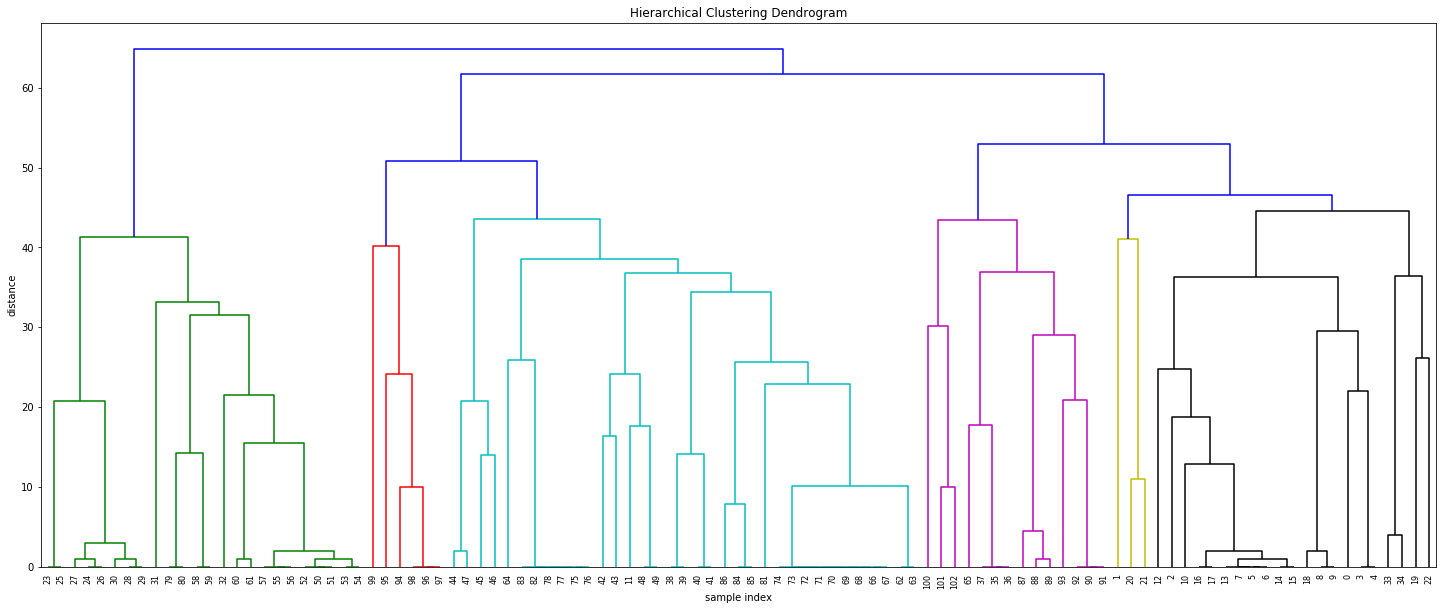

In [334]:
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
X = np.array(df3) 
Z = sch.linkage(X, 'complete')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
sch.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [335]:
# Finding optimum number of clusters to reach out fine scaling of cluster
from scipy.cluster.hierarchy import fcluster
max_d = 1.0  #setting threshold as per requirement
Z = sch.linkage(X, 'complete')
clust = fcluster(Z, max_d, criterion='distance') #clusters created from index(1-56)
k=clust.max() #number of cluster for threshold max_d=1.0
k

56

### Training Model 

In [336]:
# Installing dependency 
!pip install kmodes

In [337]:
# Preparing dataset for kmode
df_km=df[['ln1', 'ln2', 'fn1', 'fn2', 'dob_en','F','M']]
df_km=df_km.fillna("0")

In [338]:
from kmodes import kmodes
km = kmodes.KModes(n_clusters=k, init='Huang', n_init=5, verbose=0) 
clusters = km.fit_predict(df_km)
df_km['UPI'] = clusters
df_km

,ln1,ln2,fn1,fn2,dob_en,F,M,UPI
0,SMITH,JR,WILLIAM,0,21,1,0,25
1,ROTHMEYER,JR,WILLIAM,0,21,1,0,46
2,ASBY,JR,WILLIAM,0,21,1,0,50
3,SALTER,JR,WILLIAM,0,21,1,0,25
4,SALTER,JR,WILLIAM,0,21,1,0,25
5,BLAND,JR,WILLIAM,0,20,1,0,39
6,BLAND,JR,WILLIAM,0,20,1,0,39
7,BLAND,JR,WILLIAM,0,20,1,0,39
8,SHAFFER,JR,WILLIAM,0,20,1,0,18
9,SHAFFER,JR,WILLIAM,0,20,1,0,18


### Evaluating Model

In [339]:
# Creation of actual UPI label from dataset
df_act=df[['ln1','fn1','dob_en','gn']]
df_act['clust']=df_act[['gn','dob_en','ln1','fn1']].astype(str).sum(axis=1)
df_act
key=list(df_act.clust.unique())
value=list(range(0,len(df_act.clust.unique())))
di=dict(zip(key,value))
df_act['actual_UPI']=df_act.clust.map(di)
df_act

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ln1,fn1,dob_en,gn,clust,actual_UPI
0,SMITH,WILLIAM,21,F,F21SMITHWILLIAM,0
1,ROTHMEYER,WILLIAM,21,F,F21ROTHMEYERWILLIAM,1
2,ASBY,WILLIAM,21,F,F21ASBYWILLIAM,2
3,SALTER,WILLIAM,21,F,F21SALTERWILLIAM,3
4,SALTER,WILLIAM,21,F,F21SALTERWILLIAM,3
5,BLAND,WILLIAM,20,F,F20BLANDWILLIAM,4
6,BLAND,WILLIAM,20,F,F20BLANDWILLIAM,4
7,BLAND,WILLIAM,20,F,F20BLANDWILLIAM,4
8,SHAFFER,WILLIAM,20,F,F20SHAFFERWILLIAM,5
9,SHAFFER,WILLIAM,20,F,F20SHAFFERWILLIAM,5


In [340]:
# Cocatenating actual UPI with df_km
df_act=df_act['actual_UPI']
final=pd.concat([df_km,df_act],axis=1)
final.tail(53)

,ln1,ln2,fn1,fn2,dob_en,F,M,UPI,actual_UPI
50,MICHAELSON,JR,JOHN,0,9,0,1,1,31
51,MICHAELSON,JR,JOHN,0,9,0,1,1,31
52,MICHAELSON,JR,JOHN,0,9,0,1,1,31
53,MICHAELSON,JR,JOHN,0,8,0,1,8,32
54,MICHAELSON,JR,JOHN,0,8,0,1,8,32
55,MICHAELSON,JR,JOHN,0,7,0,1,16,33
56,MICHAELSON,JR,JOHN,0,7,0,1,16,33
57,MICHAELSON,JR,JOHN,0,7,0,1,16,33
58,MICHAELSON,JR,JAMES,0,7,0,1,42,34
59,MICHAELSON,JR,JAMES,0,7,0,1,42,34


In [341]:
# Combining pair of values from UPI and actual_UPI.If the length of unique values of newly created column is same as UPI column
# that means our accuracy of model is 100%. 
# Accuracy = len(unique values of UPI) /len(unique value of Combined_UPI)
final['Combined_UPI']=final[['UPI','actual_UPI']].astype(str).sum(axis=1)
final

,ln1,ln2,fn1,fn2,dob_en,F,M,UPI,actual_UPI,Combined_UPI
0,SMITH,JR,WILLIAM,0,21,1,0,25,0,250.0
1,ROTHMEYER,JR,WILLIAM,0,21,1,0,46,1,461.0
2,ASBY,JR,WILLIAM,0,21,1,0,50,2,502.0
3,SALTER,JR,WILLIAM,0,21,1,0,25,3,253.0
4,SALTER,JR,WILLIAM,0,21,1,0,25,3,253.0
5,BLAND,JR,WILLIAM,0,20,1,0,39,4,394.0
6,BLAND,JR,WILLIAM,0,20,1,0,39,4,394.0
7,BLAND,JR,WILLIAM,0,20,1,0,39,4,394.0
8,SHAFFER,JR,WILLIAM,0,20,1,0,18,5,185.0
9,SHAFFER,JR,WILLIAM,0,20,1,0,18,5,185.0


In [342]:
# The accuracy here is approximated.The actual value will be little less(around 0-2%) as I have cross checked 
# accuracy manually.  
Accuracy=len(final.UPI.unique())/len(final.Combined_UPI.unique())
Accuracy

0.9333333333333333